In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter08/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df = df.drop(['ID'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

No missing values

In [6]:
X = df.drop(['default.payment.next.month'], axis=1).values
y = df['default.payment.next.month'].values

### Data Preparation

Train / Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Scale data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Train

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

In [13]:
# Sub models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

# Meta learner
nb = GaussianNB()

Sub Model Train

In [16]:
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
print(f'DT Train score: {dt.score(X_train, y_train)}')
print(f'LR Train score: {lr.score(X_train, y_train)}')
print(f'KNN Train score: {knn.score(X_train, y_train)}')

DT Train score: 0.9995111111111111
LR Train score: 0.8094222222222223
KNN Train score: 0.8416444444444444


In [18]:
print(f'DT Test score: {dt.score(X_test, y_test)}')
print(f'LR Test score: {lr.score(X_test, y_test)}')
print(f'KNN Test score: {knn.score(X_test, y_test)}')

DT Test score: 0.7285333333333334
LR Test score: 0.8129333333333333
KNN Test score: 0.7976


Stack Result for train and test data

In [19]:
train_dt = dt.predict(X_train)
train_lr = lr.predict(X_train)
train_knn = knn.predict(X_train)

test_dt = dt.predict(X_test)
test_lr = lr.predict(X_test)
test_knn = knn.predict(X_test)

In [21]:
train_stack = np.dstack([train_dt, train_lr, train_knn, y_train])
test_stack = np.dstack([test_dt, test_lr, test_knn, y_test])

In [25]:
train_df = pd.DataFrame(train_stack.reshape(-1, 4), columns=['DT', 'LR', 'KNN', 'y'])
train_df.head()

,DT,LR,KNN,y
0,0,1,1,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,1
4,0,0,0,0


In [26]:
test_df = pd.DataFrame(test_stack.reshape(-1, 4), columns=['DT', 'LR', 'KNN', 'y'])
test_df.head()

,DT,LR,KNN,y
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,1


Train Meta Learner

In [27]:
Xm_train = train_df.drop(['y'], axis=1).values
Xm_test = test_df.drop(['y'], axis=1).values
ym_train = train_df['y'].values
ym_test = test_df['y'].values

In [28]:
nb.fit(Xm_train, ym_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Model Evaluation

In [30]:
print(f'Meta Learner train score: {nb.score(Xm_train, ym_train)}')
print(f'Meta Learner test score: {nb.score(Xm_test, ym_test)}')

Meta Learner train score: 0.9995111111111111
Meta Learner test score: 0.7285333333333334


In [29]:
ym_pred = nb.predict(Xm_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

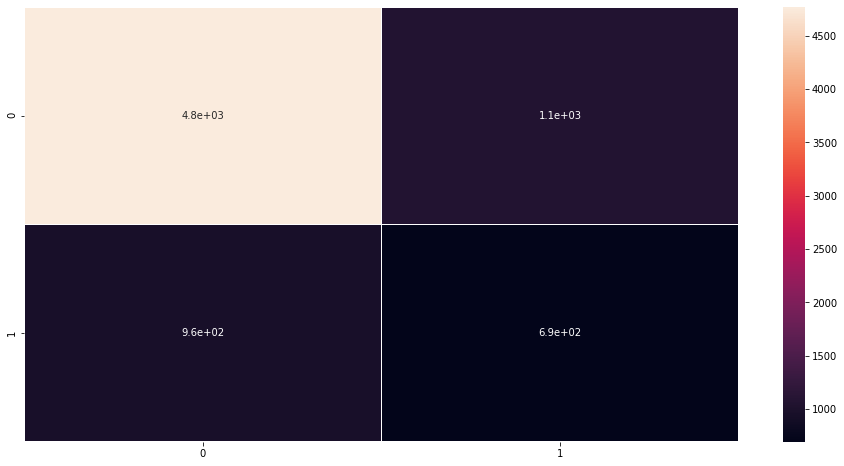

In [32]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(ym_test, ym_pred), annot=True, linewidths=0.5)
plt.show()

In [33]:
print(classification_report(ym_test, ym_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5845
           1       0.39      0.42      0.41      1655

    accuracy                           0.73      7500
   macro avg       0.61      0.62      0.61      7500
weighted avg       0.74      0.73      0.73      7500

